In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json

In [27]:
df = pd.read_csv("../dataset_output/libras_minds/libras_minds_openpose.csv")
dataset_name = "MINDS-Libras"

In [2]:
df = pd.read_csv("../dataset_output/libras_ufop/libras_ufop_openpose.csv")
dataset_name = "LIBRAS-UFOP"

In [3]:
df

,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,hand_0_2_x,...,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face,person
0,1,p1_c1_s1_0,0,0.555807,0.567531,0.394245,0.549136,0.575092,0.414851,0.543798,...,0.753184,0.433065,0.966341,0.781661,0.449489,0.928342,0.651774,False,False,1.0
1,1,p1_c1_s1_0,1,0.555086,0.561309,0.396433,0.547985,0.570326,0.402954,0.542236,...,0.751818,0.433051,0.966384,0.792620,0.449503,0.930953,0.673173,False,False,1.0
2,1,p1_c1_s1_0,2,0.552441,0.554763,0.376937,0.544950,0.563844,0.328017,0.539501,...,0.721404,0.431155,0.966412,0.771990,0.449501,0.928337,0.667928,False,False,1.0
3,1,p1_c1_s1_0,3,0.540484,0.558278,0.014662,0.539830,0.565252,0.043459,0.532311,...,0.745815,0.433046,0.966367,0.777363,0.449523,0.928312,0.661847,False,False,1.0
4,1,p1_c1_s1_0,4,0.539812,0.537244,0.100900,0.534094,0.548904,0.083215,0.531067,...,0.697552,0.433064,0.966390,0.749232,0.449475,0.930948,0.649300,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202484,47,p5_c4_s9_10,36,0.511064,0.446786,0.026157,0.538449,0.420391,0.030119,0.526901,...,0.752672,0.424943,0.955436,0.677236,0.439216,0.898344,0.543393,False,False,5.0
202485,47,p5_c4_s9_10,37,0.539804,0.431748,0.028773,0.541779,0.429114,0.030089,0.534208,...,0.725757,0.424950,0.950097,0.681652,0.437225,0.901135,0.545763,False,False,5.0
202486,47,p5_c4_s9_10,38,0.542277,0.441707,0.030453,0.542592,0.434997,0.080483,0.521517,...,0.722870,0.426986,0.952731,0.657443,0.435220,0.898388,0.555769,False,False,5.0
202487,47,p5_c4_s9_10,39,0.540754,0.450658,0.036463,0.534091,0.436443,0.065288,0.541753,...,0.716687,0.424990,0.952775,0.658890,0.437217,0.901061,0.537380,False,False,5.0


In [4]:
df_0 = df[df["frame"] == 1]

([<matplotlib.axis.XTick at 0x7f586d3a5c40>,
 [Text(1, 0, '2'),
  Text(6, 0, '7'),
  Text(11, 0, '12'),
  Text(16, 0, '17'),
  Text(21, 0, '23'),
  Text(26, 0, '28'),
  Text(31, 0, '33'),
  Text(36, 0, '38'),
  Text(41, 0, '43'),
  Text(46, 0, '48'),
  Text(51, 0, '53'),
  Text(56, 0, '')])

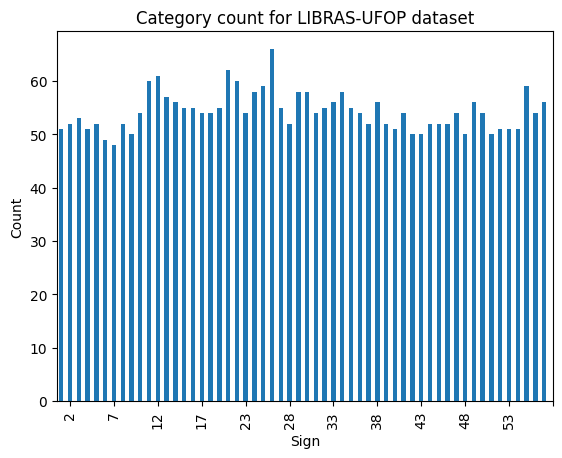

In [6]:
df_0["category"].value_counts().sort_index().plot(kind="bar")
plt.title(f"Category count for {dataset_name} dataset")
plt.ylabel("Count")
plt.xlabel("Sign")
plt.xticks(np.arange(1, 58, 5))

In [33]:
df[["video_name", "frame"]].groupby("video_name").max().describe()
# plt.title(f"Category count for {dataset_name} dataset")
# plt.ylabel("Count")
# plt.xlabel("Sign")

,frame
count,1158.000000
mean,138.411917
std,26.608733
min,70.000000
25%,120.000000
50%,137.000000
75%,155.000000
max,232.000000


In [48]:
count = df_0[["person", "category", "frame"]].groupby(["person", "category"]).count()
print("Min:", count.min())
print("Max:", count.max())

Min: frame    8
dtype: int64
Max: frame    16
dtype: int64


In [3]:
with open("../openpose_benchmark.json", "r") as f:
    openpose_benchmark = json.load(f)

In [19]:
duration_per_frame = [(i["duration"] * 1000) / i["frames"] for i in openpose_benchmark]

In [20]:
print("Mean frame extraction time:", sum(duration_per_frame) / len(duration_per_frame), "ms")
print("Std:", np.std(duration_per_frame))

Mean frame extraction time: 291.059832813444 ms
Std: 26.25490746999148


In [24]:
291 * 10

2910

In [22]:
durations = [i["duration"] for i in openpose_benchmark]
print("Mean video extraction time:", sum(durations) / len(durations), "s")
print("Std:", np.std(durations))

Mean video extraction time: 36.367036922772726 s
Std: 6.761373540555386


In [23]:
36.367036922772726 * 1000

36367.03692277273